In [31]:
import pandas as pd
import numpy as np
import seaborn as sns

In [32]:
# 데이터 불러오기
Titanic_data = pd.read_csv('../../datasets/TitanicFromDisaster_test.csv')
Titanic_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [33]:
# 결측치와 이상치 확인하기
Titanic_data.info()
Titanic_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [34]:
Titanic_data['Age'].fillna('50%')
Titanic_data['Fare'].fillna('50%')

0       7.8292
1          7.0
2       9.6875
3       8.6625
4      12.2875
        ...   
413       8.05
414      108.9
415       7.25
416       8.05
417    22.3583
Name: Fare, Length: 418, dtype: object

<Axes: xlabel='Fare'>

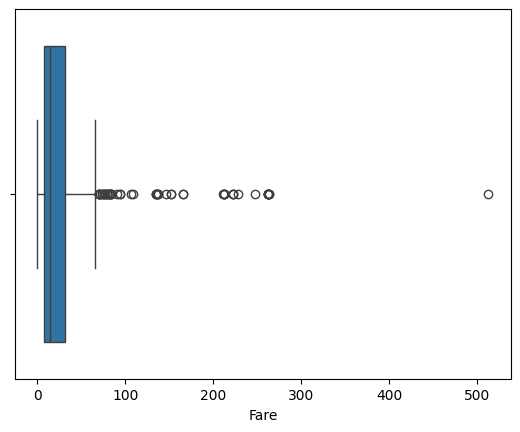

In [35]:
# 박스 플롯을 사용하여 확인
sns.boxplot(data = Titanic_data, x = 'Fare')

In [36]:
Titanic_data_describe = Titanic_data.describe()
Titanic_data_describe

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [37]:
Q1 = Titanic_data_describe.loc['25%','Fare']
Q3 = Titanic_data_describe.loc['75%','Fare']

IQR = Q3 - Q1
Q1, Q3, IQR

(7.8958, 31.5, 23.6042)

In [38]:
bound_max = Q3 + 1.5 * IQR
bound_min = Q1 - 1.5 * IQR
bound_max, bound_min

(66.9063, -27.5105)

In [39]:
condition = Titanic_data['Fare'] <= bound_max
Titanic_data_withoutlier = Titanic_data[condition]
Titanic_data_withoutlier.shape

(362, 11)

<Axes: xlabel='Fare'>

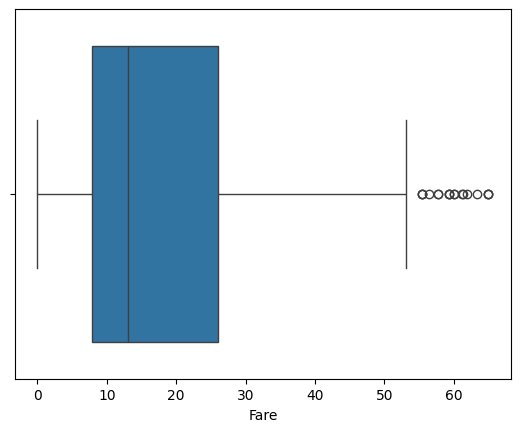

In [40]:
sns.boxplot(data = Titanic_data_withoutlier, x = 'Fare')

In [41]:
Titanic_data.dropna(inplace = True)
np.percentile(Titanic_data['Fare'], 75)

135.06664999999998

In [42]:
# 시간부족... 어렴풋이 이해 및 기능들 응용 부족